# Interpolation 2024.3.11

### Jun & Maxwell GU & GPT

## Neville's Iterated Interpolation

To fit function 
$$ f(x) = \frac{a}{x^2+a^2}$$

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random

In [49]:
'''
a = float(input(' What is a for function a/(x^2+a^2):'))
h = float(input(' The stepsize for interpolation:')) 
n = int(input(' The number of points:'))-1
'''
h = 0.3
n = 10
def Interpolation_try(a):
    def func(x,a):
        return a/(x**2+a**2)
    x = np.linspace(-10, 10, 1000)
    y = func(x,a)
    x_t = [0]*(2*n+2)
    y_t = [0]*(2*n+2)
    x_t[0] = random.uniform(0, 3-(n+1)*h)
    y_t[0] = func(x_t[0],a)
    for i in range(1,n+1):
        x_t[i] = x_t[i-1] + h
        y_t[i] = func(x_t[i],a)
    for i in range(n+1,2*n+2):
        x_t[i] = -x_t[2*n+1-i]
        y_t[i] = y_t[2*n+1-i]
    def divided_differences(x_values, y_values):
        n = len(x_values)
        F = np.zeros((n, n))  
        F[:, 0] = y_values  
    
        for j in range(1, n):
            for i in range(j, n):
                F[i, j] = (F[i, j - 1] - F[i - 1, j - 1]) / (x_values[i] - x_values[i - j])
    
        return F.diagonal()

    def neville_interpolation(x_values, y_values, x):
        n = len(x_values)
        F = divided_differences(x_values, y_values)
        result = F[0]
        for i in range(1, n):
            term = F[i]
            for j in range(i):
                term *= (x - x_values[j])
            result += term
        return result

    x_neville = np.linspace(-10,10,1000)
    y_neville = neville_interpolation(x_t, y_t, x_neville)

    plt.plot(x_neville, y_neville,label='Interpolation function')
    plt.plot(x,y,color = 'darkorange',label='target function')
    plt.xlim(-5,5)
    plt.ylim(-2,10)
    plt.title('Graph of Neville\'s interpolation')
    plt.xlabel('x')
    plt.ylabel('function')
    plt.scatter(x_t,y_t,color='firebrick',label='chosen points')
    plt.legend()
    plt.grid()
    plt.show()

when $a=0.1$

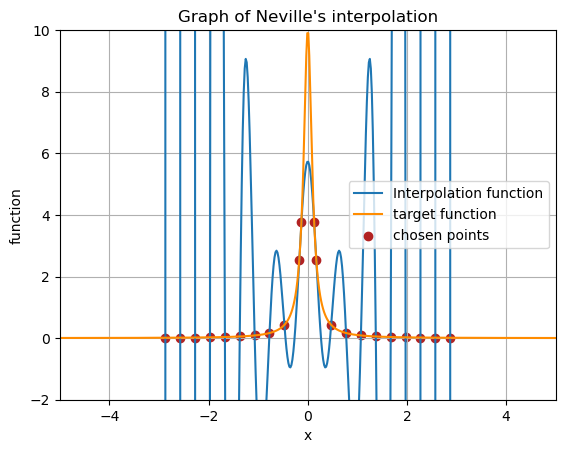

In [51]:
Interpolation_try(a=0.1)

when $a = 0.01 $

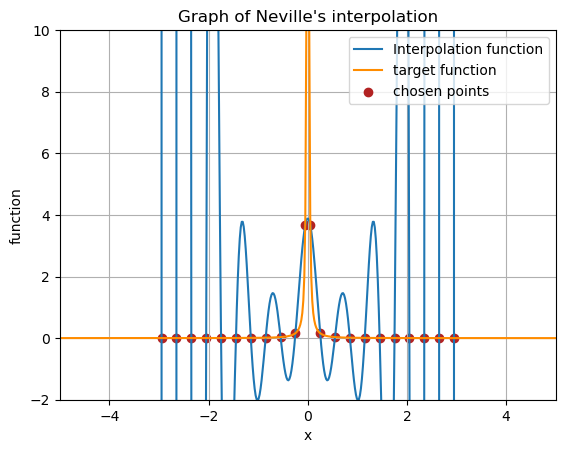

In [52]:
Interpolation_try(a=0.01)

when $a=0.001$

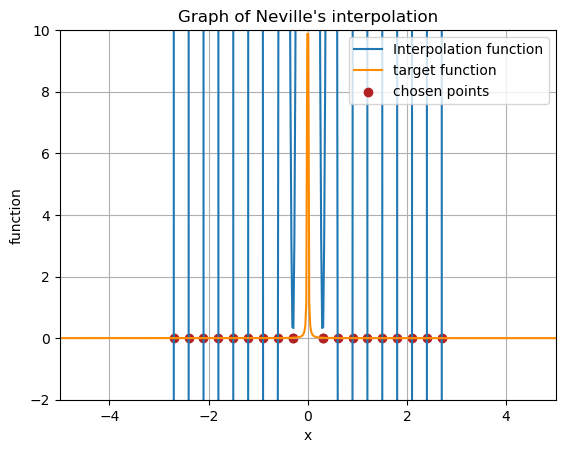

In [53]:
Interpolation_try(a=0.001)